## Project title: Loan Default Prediction Model

## Data Understanding

- The Dataset was sourced from Credit Reference buerau
- The Application dataset contains 9,492 records and 16 columns related to loan applications.

- Data Types:
     - Numerical Columns: Age_at_Application, Time_at_Current_Employment, Time_Employed_with_Previous_Employer, Number_of_Dependents, Monthly_Income.
     - Categorical Columns: Loan_Approval_Status, Marital_Status, Gender, Own_Rent_Home, Occupation_Professional_Category, Employment_Status, Loan_Purpose, Government_Employee.
     - Date Column: Application_Date.

Missing Data:
- - Several columns have missing values, including Marital_Status, Type_of_Business_Industry_of_Employment, Number_of_Dependents, and Time_Employed_with_Previous_Employer.


## Data Preparation and Data Cleaning for Application Data

### Loading the Libraries

In [426]:
import pandas as pd
import numpy as np

In [427]:
# Loading the Dataset
df_application = pd.read_csv("ApplicationData.csv")


In [428]:
# Data Understanding
# Checking the first 5 rows of the dataset
df_application.info()
print(df_application.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Application_ID                                 9492 non-null   object 
 1   Application_Date                               9492 non-null   object 
 2   Loan_Approval_Status                           9354 non-null   object 
 3   Age_at_Application                             9471 non-null   float64
 4   Marital_Status                                 7712 non-null   object 
 5   Gender                                         9488 non-null   object 
 6   Own_Rent_Home                                  8188 non-null   object 
 7   Occupation_Professional_Category               9361 non-null   object 
 8   Type_of_Business_Industry_of_Employment        7210 non-null   object 
 9   Employment_Status                              9357 

## Handling Missing Values in the dataset

In [429]:
# Identifying the missing values
missing_values = df_application.isnull().sum()
print(missing_values)

Application_ID                                      0
Application_Date                                    0
Loan_Approval_Status                              138
Age_at_Application                                 21
Marital_Status                                   1780
Gender                                              4
Own_Rent_Home                                    1304
Occupation_Professional_Category                  131
Type_of_Business_Industry_of_Employment          2282
Employment_Status                                 135
Time_at_Current_Employment_(Months)               232
Time_Employed_with_Previous_Employer_(Months)    9194
Number_of_Dependents                             1814
Loan_Purpose                                       42
Monthly_Income                                      0
Government_Employee                               181
dtype: int64


In [430]:
# Checking percentage of missing values
missing_values = df_application.isnull().sum() / len(df_application) * 100
print("Missing Values Percentage:\n", missing_values[missing_values > 0])


Missing Values Percentage:
 Loan_Approval_Status                              1.453856
Age_at_Application                                0.221239
Marital_Status                                   18.752634
Gender                                            0.042141
Own_Rent_Home                                    13.737885
Occupation_Professional_Category                  1.380110
Type_of_Business_Industry_of_Employment          24.041298
Employment_Status                                 1.422250
Time_at_Current_Employment_(Months)               2.444164
Time_Employed_with_Previous_Employer_(Months)    96.860514
Number_of_Dependents                             19.110830
Loan_Purpose                                      0.442478
Government_Employee                               1.906869
dtype: float64


### Key Observations:
 - Three columns have High Missing Values of mpre than >20%
 - Type_of_Business_Industry_of_Employment (24.04%)
 - Marital_Status (18.75%)
 - Number_of_Dependents (19.11%)
 - Time_Employed_with_Previous_Employer (96.86%) → Too much missing data, may need to drop.
 - 8 Columns has Low Missing Values of below <5% Can be imputed using mode (for categorical) or median/mean (for numerical).

Action Taken Next Steps:
 - Drop Time_Employed_with_Previous_Employer due to excessive missing data.
 - Impute categorical variables using the mode.
 - Impute numerical variables using the median.

In [431]:
# Drop column with excessive missing values
df_application.drop(columns=['Time_Employed_with_Previous_Employer_(Months)'], inplace=True)

In [432]:
# Fill missing numerical data with median values
num_cols = ['Age_at_Application', 'Time_at_Current_Employment_(Months)', 'Number_of_Dependents']
for col in num_cols:
    df_application[col].fillna(df_application[col].median(), inplace=True)


In [433]:
# Fill missing categorical data with the most frequent value (mode)
cat_cols = ['Marital_Status', 'Own_Rent_Home', 'Gender', 'Loan_Approval_Status', 
            'Employment_Status', 'Occupation_Professional_Category', 
            'Type_of_Business_Industry_of_Employment', 'Loan_Purpose', 'Government_Employee']

for col in cat_cols:
    df_application[col].fillna(df_application[col].mode()[0], inplace=True)

In [434]:
# Verify missing values are handled
print("Missing values after handling:", df_application.isnull().sum().sum())

Missing values after handling: 0


#### Comment: All missing values in the application dataset have been successfully handled.

## Handling Duplicate Data

In [435]:
# Checking for duplicate values
df_application.duplicated().sum()

0

#### Comment:- No duplicate records were found in the application dataset

## Handling Anomalies and Outliers in the dataset

In [436]:
# Select numerical columns
num_columns = ['Age_at_Application', 'Time_at_Current_Employment_(Months)', 'Monthly_Income', 'Number_of_Dependents']

# Calculate IQR for outlier detection
Q1 = df_application[num_columns].quantile(0.25)
Q3 = df_application[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers using Winsorization
for col in num_columns:
    df_application[col] = np.where(df_application[col] < lower_bound[col], lower_bound[col], df_application[col])
    df_application[col] = np.where(df_application[col] > upper_bound[col], upper_bound[col], df_application[col])

# Step 5: Handling Text Data
# Convert categorical columns to string and standardize format
for col in cat_cols:
    df_application[col] = df_application[col].astype(str).str.strip().str.lower()

# Check cleaned categorical data
unique_values = {col: df_application[col].unique() for col in ['Gender', 'Marital_Status', 'Loan_Approval_Status', 'Own_Rent_Home']}
print("Unique Values in Categorical Columns:\n", unique_values)

Unique Values in Categorical Columns:
 {'Gender': array(['female', 'male'], dtype=object), 'Marital_Status': array(['unmarried', 'married', 'other', 'widowed', 'divorced'],
      dtype=object), 'Loan_Approval_Status': array(['approved', 'customer cancellation', 'decline', 'suspend'],
      dtype=object), 'Own_Rent_Home': array(['own', 'family', 'rent', 'other', 'company'], dtype=object)}


### Checking if the date column is correctly formatted

In [509]:
print(df_application.dtypes)  # Look for 'object' type instead of 'datetime64'

Application_ID                              object
Application_Date                            object
Loan_Approval_Status                        object
Age_at_Application                         float64
Marital_Status                              object
Gender                                      object
Own_Rent_Home                               object
Occupation_Professional_Category            object
Type_of_Business_Industry_of_Employment     object
Employment_Status                           object
Time_at_Current_Employment_(Months)        float64
Number_of_Dependents                       float64
Loan_Purpose                                object
Monthly_Income                             float64
Government_Employee                         object
dtype: object


### Convert date time format

In [512]:
df_application['Application_Date'] = pd.to_datetime(df_application['Application_Date'], errors='coerce')

In [513]:
print(df_application[df_application['Application_Date'].isnull()])  # Check rows with missing dates


     Application_ID Application_Date   Loan_Approval_Status  \
115      C302100116              NaT               approved   
116      C302100117              NaT               approved   
117      C302100118              NaT               approved   
118      C302100119              NaT               approved   
119      C302100120              NaT               approved   
...             ...              ...                    ...   
9448     C302109449              NaT  customer cancellation   
9451     C302109452              NaT               approved   
9455     C302109456              NaT               approved   
9457     C302109458              NaT               approved   
9475     C302109476              NaT               approved   

      Age_at_Application Marital_Status  Gender Own_Rent_Home  \
115                 46.0        married    male          rent   
116                 25.0      unmarried    male        family   
117                 19.0      unmarried    male 

## Standardize dates format

In [515]:
df_application['Application_Date'] = df_application['Application_Date'].dt.strftime('%Y-%m-%d')


##  Saving the cleaned dataset

In [516]:
cleaned_file_path = "Cleaned_ApplicationData.csv"
df_application.to_csv(cleaned_file_path, index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


# Data Preparation and Data Cleaning for ContractsData.csv

### Data Understanding:
 - The ContractsData dataset has 9,374 rows and 9 columns.

#### Data Types:
 - Numeric: Key (integer), Total_Loan_Amount (float).
 - Categorical/Text: Contract_ID, Application_ID, Loan_Type, Contract_Start_Date, Expected_Contract_End_Date, Actual_Contract_End_Date,Loan_Term.


### Observations:
 - Loan_Type has only one unique value ("Unsecured Personal Loan"), making it redundant.
 - Application_ID has missing values (7,598 non-null out of 9,374).
 - Actual_Contract_End_Date has many missing values (only 2,593 non-null).
 - Loan_Term has 110 unique values, requiring further inspection.
 - Contract_Start_Date seems to have an inconsistent format ("202-1-03-19" may be a typo).

## Loading the Libraries

In [438]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the ContractsData dataset

In [439]:
# Load dataset
df_ContractsData = pd.read_csv("ContractsData.csv")


In [440]:
# Data Understanding
# Checking the first 5 rows of the dataset
df_ContractsData.info()
print(df_ContractsData.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contract_ID                 9374 non-null   object 
 1   Application_ID              7598 non-null   object 
 2   Key                         9374 non-null   int64  
 3   Loan_Type                   9374 non-null   object 
 4   Contract_Start_Date         9374 non-null   object 
 5   Expected_Contract_End_Date  9374 non-null   object 
 6   Actual_Contract_End_Date    2593 non-null   object 
 7   Loan_Term                   9374 non-null   object 
 8   Total_Loan_Amount           9374 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 659.2+ KB
  Contract_ID Application_ID  Key                Loan_Type  \
0  CONT100001     C302103426    1  Unsecured Personal Loan   
1  CONT100002     C302103426    2  Unsecured Personal Loan   
2  CONT100003    

In [441]:
print("\nSummary Statistics:")
print(df_ContractsData.describe())


Summary Statistics:
               Key  Total_Loan_Amount
count  9374.000000        9374.000000
mean      1.302752       24271.437439
std       0.635954       23807.037921
min       1.000000           0.000000
25%       1.000000        8620.267500
50%       1.000000       15115.240000
75%       1.000000       30893.970000
max       4.000000      239137.160000


### Handling Missing Data

In [442]:
missing_values = df_ContractsData.isnull().sum()
print(missing_values)

Contract_ID                      0
Application_ID                1776
Key                              0
Loan_Type                        0
Contract_Start_Date              0
Expected_Contract_End_Date       0
Actual_Contract_End_Date      6781
Loan_Term                        0
Total_Loan_Amount                0
dtype: int64


In [443]:
# Checking percentage of missing values
missing_values = df_ContractsData.isnull().sum() / len(df_ContractsData) * 100
print("Missing Values Percentage:\n", missing_values[missing_values > 0])

Missing Values Percentage:
 Application_ID              18.946021
Actual_Contract_End_Date    72.338383
dtype: float64


#### Key Observations:
 - Application_ID: 18.95% missing.
 - Actual_Contract_End_Date: 72.34% missing

#### Next action:
 - To handle missing values in Applicatio_ID column, I suggest we Fill missing values with "Unknown" or investigate if they can be inferred.
 - Likely due to ongoing contracts, I suggest we  can replace missing values with "Ongoing".



In [444]:
# Fill missing Application_ID with 'Unknown'
df_ContractsData["Application_ID"].fillna("Unknown", inplace=True)

# Fill missing Actual_Contract_End_Date with 'Ongoing'
df_ContractsData["Actual_Contract_End_Date"].fillna("Ongoing", inplace=True)

### Handling the Duplicates

In [445]:
# Handling Duplicate Data
duplicate_count = df_ContractsData.duplicated().sum()
print("\nDuplicate Rows:", duplicate_count)


Duplicate Rows: 0


#### Comment:- No duplicate records were found in the application dataset

### Handling Outliers and Anomalies

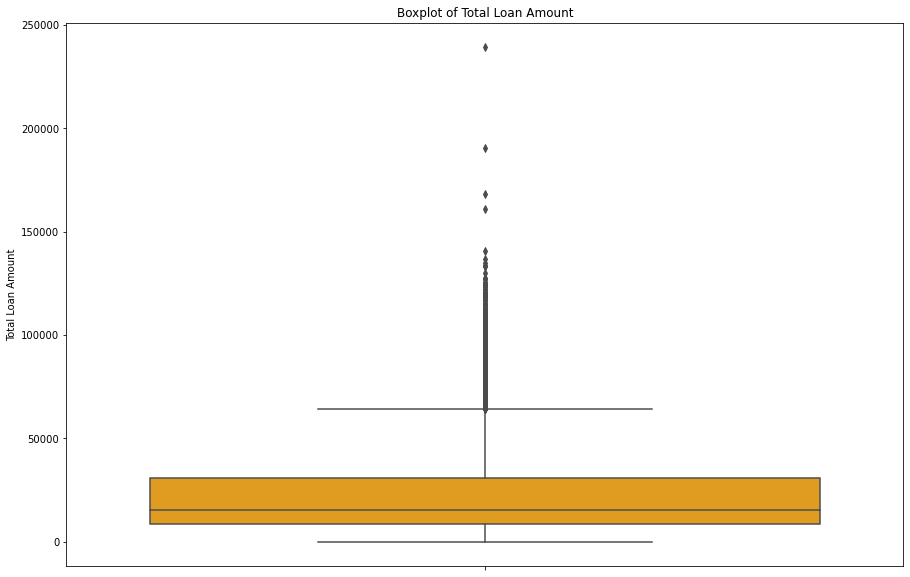

In [446]:
#Handling Outliers (Total Loan Amount)
plt.figure(figsize=(15, 10))
sns.boxplot(y=df_ContractsData["Total_Loan_Amount"], color="orange") 
plt.title("Boxplot of Total Loan Amount")
plt.ylabel("Total Loan Amount")
plt.show()

### Key Observations
 - Total Loan Amount has some extreme values above 107,990.18, with a maximum of 239,137.16.
 - These could be valid high-value loans rather than errors.
 - Instead of removing, we can cap extreme values at the 99th percentile (107,990.18) to prevent skewed analysis.

In [447]:
## Capping extreme outliers at 99th percentile
cap_value = df_ContractsData["Total_Loan_Amount"].quantile(0.99)
df_ContractsData["Total_Loan_Amount"] = df_ContractsData["Total_Loan_Amount"].clip(upper=cap_value)

### Comments:- The Total_Loan_Amount has been capped at 107,891.23, reducing extreme outliers while preserving data integrity

### Handling Text Data

In [448]:
# Convert date columns to datetime format
date_columns = ["Contract_Start_Date", "Expected_Contract_End_Date", "Actual_Contract_End_Date"]
for col in date_columns:
    df_ContractsData[col] = pd.to_datetime(df_ContractsData[col], errors="coerce")

# Standardizing Loan_Term format
df_ContractsData["Loan_Term"] = df_ContractsData["Loan_Term"].str.replace(r"\s+", " ", regex=True).str.strip()

### Creating the cleaned dataset

In [449]:
df_ContractsData.to_csv("Cleaned_ContractsData.csv", index=False)

print("\nData cleaning completed. Cleaned dataset saved as 'Cleaned_ContractsData.csv'.")


Data cleaning completed. Cleaned dataset saved as 'Cleaned_ContractsData.csv'.


## Data Preparation and Data Cleaning - ContractSnapshotData.csv

## Loading the dataset

In [450]:
# Load the dataset
df_ContractsSnapshotData = pd.read_csv("ContractsSnapshotData.csv")


In [451]:
# Checking the first five rows of the dataset
df_ContractsSnapshotData.head()

,Contract_ID,Snapshot Date,Outstanding Amount,Due Amount,Number of Days Past Due,Contract Status
0,CONT109375,2018-12-31,0.00,0.0,NaN,Closed
1,CONT109376,2006-08-31,215.08,0.0,NaN,Active
2,CONT109376,2006-09-30,215.08,0.0,NaN,Active
3,CONT109376,2006-10-31,215.08,0.0,NaN,Active
4,CONT109376,2006-11-30,215.08,0.0,NaN,Active


In [452]:
# Checking the number of rows and columns
df_ContractsSnapshotData.shape

(274371, 6)

### Comments:- The ContractSnapshot dataset contains 274'371 records and 6 columns related to loan applications.


In [453]:
# Separate numeric and categorical columns
numeric_cols = df_ContractsSnapshotData.select_dtypes(include=['number']).columns
categorical_cols = df_ContractsSnapshotData.select_dtypes(exclude=['number']).columns

# Display unique values count for each categorical column
unique_values = {col: df_ContractsSnapshotData[col].nunique() for col in categorical_cols}

# Print results
print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))
print("Unique Values:", list(unique_values))

Numeric Columns: ['Outstanding Amount', 'Due Amount', 'Number of Days Past Due']
Categorical Columns: ['Contract_ID', 'Snapshot Date', 'Contract Status']
Unique Values: ['Contract_ID', 'Snapshot Date', 'Contract Status']


In [454]:
#Identify column data types using 
df_ContractsSnapshotData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274371 entries, 0 to 274370
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Contract_ID              274371 non-null  object 
 1   Snapshot Date            274371 non-null  object 
 2   Outstanding Amount       274371 non-null  float64
 3   Due Amount               274371 non-null  float64
 4   Number of Days Past Due  79158 non-null   float64
 5   Contract Status          274371 non-null  object 
dtypes: float64(3), object(3)
memory usage: 12.6+ MB


In [455]:
print("\nSummary Statistics:")
print(df_ContractsSnapshotData.describe())


Summary Statistics:
       Outstanding Amount     Due Amount  Number of Days Past Due
count        2.743710e+05  274371.000000             79158.000000
mean         2.516123e+04     384.217923                65.570606
std          4.084894e+04    2431.451256               141.958344
min         -7.087329e+04       0.000000                 0.000000
25%          3.697200e+03       0.000000                 0.000000
50%          1.123487e+04       0.000000                 5.000000
75%          3.028738e+04       1.760000                60.000000
max          1.059941e+06  211534.630000              1765.000000


### Handling Missing Values

In [456]:
missing_values = df_ContractsSnapshotData.isnull().sum()
print(missing_values)

Contract_ID                     0
Snapshot Date                   0
Outstanding Amount              0
Due Amount                      0
Number of Days Past Due    195213
Contract Status                 0
dtype: int64


In [457]:
# Checking percentage of missing values
missing_values = df_ContractsSnapshotData.isnull().sum() / len(df_ContractsSnapshotData) * 100
print("Missing Values Percentage:\n", missing_values[missing_values > 0])

Missing Values Percentage:
 Number of Days Past Due    71.149283
dtype: float64


### Key Observations:
 - The dataset on ContractSnapshot.csv has 195,213 or 71.14% Number of missing values under Number of Days Past Due column

### Next Action
To handle missing values check if data is normaly distributed using histogram and sharpiro wilk-test

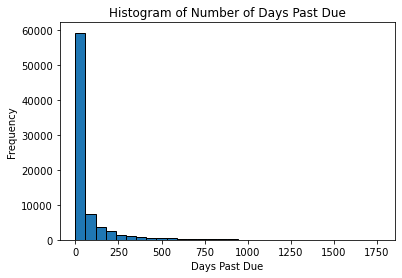

In [458]:
# Checking if dataset is normally distributed
plt.hist(df_ContractsSnapshotData['Number of Days Past Due'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Number of Days Past Due')
plt.xlabel('Days Past Due')
plt.ylabel('Frequency')
plt.show()

In [459]:
from scipy.stats import shapiro

stat, p = shapiro(df_ContractsSnapshotData['Number of Days Past Due'].dropna())
print(f'Statistic={stat}, p-value={p}')

Statistic=0.5123794078826904, p-value=0.0


c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [460]:
from scipy.stats import skew, kurtosis

print(f'Skewness: {skew(df_ContractsSnapshotData["Number of Days Past Due"].dropna())}')
print(f'Kurtosis: {kurtosis(df_ContractsSnapshotData["Number of Days Past Due"].dropna())}')

Skewness: 3.836580093974453
Kurtosis: 18.481616115671912


### Key Observation
 - The histogram and Skweness test shows the dataset is not normaly distributed  given the shape of the bell 
 - The skwenss of 3.8 and Kurtosis of 18.48 implies the data is highly skewed

### Action:

- Given the dataset is not normally distributed, we suggest to use median imputation to handle the missing values in the Number of Days Past Due column

In [461]:
# Filling the missing values using median
df_ContractsSnapshotData['Number of Days Past Due'].fillna(df_ContractsSnapshotData['Number of Days Past Due'].median(), inplace=True)


In [462]:
# Verify missing values are handled
print("Missing values after handling:", df_ContractsSnapshotData.isnull().sum().sum())

Missing values after handling: 0


## Handling Duplicates

In [463]:
# Handling Duplicate Data
duplicate_count = df_ContractsSnapshotData.duplicated().sum()
print("\nDuplicate Rows:", duplicate_count)


Duplicate Rows: 84


#### Comment:- 84 duplicate records were found in the ContractSnapshot dataset

In [464]:
df_ContractsSnapshotData[df_ContractsSnapshotData.duplicated()]


,Contract_ID,Snapshot Date,Outstanding Amount,Due Amount,Number of Days Past Due,Contract Status
197024,CONT113851,2015-02-29,2832.12,203.12,0.0,Active
197053,CONT113852,2015-02-29,0.00,0.00,0.0,Active
197083,CONT113853,2015-02-29,433.25,20.07,0.0,Active
197135,CONT113854,2015-02-29,2058.73,169.73,0.0,Active
197170,CONT113855,2015-02-29,787.53,84.13,0.0,Active
...,...,...,...,...,...,...
200299,CONT113930,2015-02-29,0.00,0.00,0.0,Active
200348,CONT113931,2015-02-29,838.03,134.63,0.0,Active
200386,CONT113932,2015-02-29,843.77,140.38,0.0,Active
200438,CONT113933,2015-02-29,0.00,0.00,0.0,Active


In [465]:
# Drop all the duplicates column
df_ContractsSnapshotData = df_ContractsSnapshotData.drop_duplicates()

In [466]:
# Verify the duplicated have been dropped
duplicate_count = df_ContractsSnapshotData.duplicated().sum()
print("\nDuplicate Rows:", duplicate_count)


Duplicate Rows: 0


## Creating a Cleaned Dataset for ContractSnapShot

In [467]:
df_ContractsSnapshotData.to_csv("Cleaned_ContractSnapShop.csv", index=False)

print("\nData cleaning completed. Cleaned dataset saved as 'Cleaned_ContractSnapshot.csv'.")


Data cleaning completed. Cleaned dataset saved as 'Cleaned_ContractSnapshot.csv'.


## Data Preparation and Data Cleaning - CRB Data.csv

## Loading the dataset

In [468]:
# Load dataset
df_CRBData = pd.read_csv("CRB Data.csv")

In [469]:
df_CRBData.shape

(6750, 4)

### Comments:- The CRB Data dataset contains 6750 records and 4 columns 

In [470]:
# Separate numeric and categorical columns
numeric_cols = df_CRBData.select_dtypes(include=['number']).columns
categorical_cols = df_CRBData.select_dtypes(exclude=['number']).columns

# Display unique values count for each categorical column
unique_values = {col: df_CRBData[col].nunique() for col in categorical_cols}

# Print results
print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))
print("Unique Values:", list(unique_values))

Numeric Columns: ['CRB Score']
Categorical Columns: ['Application_ID', 'Application_Date', 'CRB Grade']
Unique Values: ['Application_ID', 'Application_Date', 'CRB Grade']


In [471]:
df_CRBData.head()

,Application_ID,Application_Date,CRB Score,CRB Grade
0,C302102137,2017-09-30,593,D
1,C302106175,2017-09-30,625,C
2,C302106175,2018-10-31,616,C
3,C302103572,2018-02-28,629,C
4,C302100598,2016-01-31,685,A


In [472]:
#Identify column data types using 
df_CRBData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    6750 non-null   object
 1   Application_Date  6750 non-null   object
 2   CRB Score         6750 non-null   int64 
 3   CRB Grade         6750 non-null   object
dtypes: int64(1), object(3)
memory usage: 211.1+ KB


In [473]:
print("\nSummary Statistics:")
print(df_CRBData.describe())


Summary Statistics:
         CRB Score
count  6750.000000
mean    617.440741
std     133.150431
min     250.000000
25%     598.000000
50%     631.000000
75%     660.000000
max     999.000000


## Checking and Handling Missing Values

In [474]:
missing_values = df_CRBData.isnull().sum()
print(missing_values)

Application_ID      0
Application_Date    0
CRB Score           0
CRB Grade           0
dtype: int64


### Checking and Handling Duplicate Values

In [475]:
# Handling Duplicate Data
duplicate_count = df_CRBData.duplicated().sum()
print("\nDuplicate Rows:", duplicate_count)


Duplicate Rows: 0


### Creating a new dataset for CRB Data

In [476]:
df_CRBData.to_csv("Cleaned_CRBDATA.csv", index=False)

print("\nData cleaning completed. Cleaned dataset saved as 'Cleaned_CRBData.csv'.")


Data cleaning completed. Cleaned dataset saved as 'Cleaned_CRBData.csv'.


## Data Preparation and Data Cleaning - Current and Savings Account Data.csv

In [477]:
# Load dataset
df_CurrentandSavingsAccountData = pd.read_csv("Current and Savings Account Data.csv")

In [478]:
df_CurrentandSavingsAccountData.shape

(857677, 31)

In [479]:
df_CurrentandSavingsAccountData.head()

,ID,Account_Number,Application ID,Month (YYYY-MM),Open Date,Closed Date,Average Balance,Overdraft Limit,Number of Days in Debit during Month,Number of Days in Credit during Month,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,1,ACC10000001,C302100001,2015-09-01,2015-09-06,NaN,1986.09,0.0,0.0,25.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,2015-09-01
1,2,ACC10000002,C302100001,2015-09-01,2015-09-06,2018-10-04,23.45,NaN,0.0,25.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Closed,0.0,2015-09-01
2,3,ACC10000001,C302100001,2015-10-01,2015-09-06,NaN,8120.71,0.0,0.0,31.0,...,NaN,0.0,58.62,1.0,NaN,0.0,Savings,Active,0.0,2015-10-01
3,4,ACC10000002,C302100001,2015-10-01,2015-09-06,2018-10-04,25.26,NaN,0.0,31.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Closed,0.0,2015-10-01
4,5,ACC10000001,C302100001,2015-11-01,2015-09-06,NaN,6624.10,0.0,0.0,30.0,...,NaN,0.0,989.57,3.0,NaN,0.0,Savings,Active,0.0,2015-11-01


### Comments:- The Current and Savings Account Data dataset contains 857677 records and 31 columns 

In [480]:
# Separate numeric and categorical columns
numeric_cols = df_CurrentandSavingsAccountData.select_dtypes(include=['number']).columns
categorical_cols = df_CurrentandSavingsAccountData.select_dtypes(exclude=['number']).columns

# Display unique values count for each categorical column
unique_values = {col: df_CurrentandSavingsAccountData[col].nunique() for col in categorical_cols}

# Print results
print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))
print("Unique Values:", list(unique_values))

Numeric Columns: ['ID', 'Average Balance', 'Overdraft Limit', 'Number of Days in Debit during Month', 'Number of Days in Credit during Month', 'Maximum End of Day Balance', 'Minimum End of Day Balance', 'Sum of Monthly Debit Transactions', 'Sum of Monthly Credit Transactions', 'Sum of ATM Deposits', 'Number of ATM Deposits', 'Sum of ATM Withdrawals', 'Number of ATM Withdrawals', 'Sum of Cheque Debit Transactions', 'Number of Cheque Debit Transactions', 'Sum of Bounced Cheque transactions', 'Number of Bounced Cheques', 'Sum of Debit Card POS Transactions', 'Number of Debit Card POS Transactions', 'Sum of Over the Counter Withdrawals', 'Number of Over the Counter withdrawals', 'Number of Joint Holders']
Categorical Columns: ['Account_Number', 'Application ID', 'Month (YYYY-MM)', 'Open Date', 'Closed Date', 'Last Transaction Date', 'Account Type', 'Account Status', 'SpshotMonth']
Unique Values: ['Account_Number', 'Application ID', 'Month (YYYY-MM)', 'Open Date', 'Closed Date', 'Last Trans

In [481]:
#Identify column data types using 
df_CurrentandSavingsAccountData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857677 entries, 0 to 857676
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      857677 non-null  int64  
 1   Account_Number                          857677 non-null  object 
 2   Application ID                          857672 non-null  object 
 3   Month (YYYY-MM)                         857647 non-null  object 
 4   Open Date                               857647 non-null  object 
 5   Closed Date                             161748 non-null  object 
 6   Average Balance                         857647 non-null  float64
 7   Overdraft Limit                         753484 non-null  float64
 8   Number of Days in Debit during Month    857647 non-null  float64
 9   Number of Days in Credit during Month   857647 non-null  float64
 10  Maximum End of Day Balance              8576

In [482]:
print("\nSummary Statistics:")
print(df_CurrentandSavingsAccountData.describe())


Summary Statistics:
                  ID  Average Balance  Overdraft Limit  \
count  857677.000000    857647.000000         753484.0   
mean   428839.000000       758.212527              0.0   
std    247590.167751      2829.181786              0.0   
min         1.000000    -30735.730000              0.0   
25%    214420.000000        11.720000              0.0   
50%    428839.000000        79.740000              0.0   
75%    643258.000000       552.215000              0.0   
max    857677.000000    281359.910000              0.0   

       Number of Days in Debit during Month  \
count                         857647.000000   
mean                               0.873334   
std                                4.972188   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                               31.000000   

       Number of Days in Credit 

### Checking and handling missing values

In [483]:
missing_values = df_CurrentandSavingsAccountData.isnull().sum()
print(missing_values)

ID                                             0
Account_Number                                 0
Application ID                                 5
Month (YYYY-MM)                               30
Open Date                                     30
Closed Date                               695929
Average Balance                               30
Overdraft Limit                           104193
Number of Days in Debit during Month          30
Number of Days in Credit during Month         30
Maximum End of Day Balance                    30
Minimum End of Day Balance                    30
Sum of Monthly Debit Transactions          24686
Sum of Monthly Credit Transactions           148
Last Transaction Date                     332006
Sum of ATM Deposits                       843053
Number of ATM Deposits                        30
Sum of ATM Withdrawals                    668968
Number of ATM Withdrawals                     30
Sum of Cheque Debit Transactions          857043
Number of Cheque Deb

In [484]:
# Checking percentage of missing values
missing_values = df_CurrentandSavingsAccountData.isnull().sum() / len(df_CurrentandSavingsAccountData) * 100
print("Missing Values Percentage:\n", missing_values[missing_values > 0])

Missing Values Percentage:
 Application ID                             0.000583
Month (YYYY-MM)                            0.003498
Open Date                                  0.003498
Closed Date                               81.141152
Average Balance                            0.003498
Overdraft Limit                           12.148280
Number of Days in Debit during Month       0.003498
Number of Days in Credit during Month      0.003498
Maximum End of Day Balance                 0.003498
Minimum End of Day Balance                 0.003498
Sum of Monthly Debit Transactions          2.878240
Sum of Monthly Credit Transactions         0.017256
Last Transaction Date                     38.709911
Sum of ATM Deposits                       98.294929
Number of ATM Deposits                     0.003498
Sum of ATM Withdrawals                    77.997661
Number of ATM Withdrawals                  0.003498
Sum of Cheque Debit Transactions          99.926079
Number of Cheque Debit Transactions 

In [485]:
missing_percentages_sorted = missing_values[missing_values > 0].sort_values()
print(missing_percentages_sorted)


Application ID                             0.000583
Account Status                             0.003498
Account Type                               0.003498
Number of Over the Counter withdrawals     0.003498
Number of Debit Card POS Transactions      0.003498
Number of Bounced Cheques                  0.003498
Number of Cheque Debit Transactions        0.003498
Number of ATM Withdrawals                  0.003498
Number of Joint Holders                    0.003498
Number of ATM Deposits                     0.003498
SpshotMonth                                0.003498
Month (YYYY-MM)                            0.003498
Open Date                                  0.003498
Maximum End of Day Balance                 0.003498
Average Balance                            0.003498
Number of Days in Credit during Month      0.003498
Minimum End of Day Balance                 0.003498
Number of Days in Debit during Month       0.003498
Sum of Monthly Credit Transactions         0.017256
Sum of Month

In [486]:
#Identify columns with missing values above 30%
# Set threshold percentage
threshold = 30  
# Calculate missing %
missing_values = (df_CurrentandSavingsAccountData.isnull().sum() / len(df_CurrentandSavingsAccountData)) * 100  
# Select columns to drop
cols_to_drop = missing_values[missing_values > threshold].index  

In [487]:
df_CurrentandSavingsAccountData = df_CurrentandSavingsAccountData.drop(columns=cols_to_drop)

In [488]:
print(f"Remaining columns: {df_CurrentandSavingsAccountData.shape[1]}")
print(f"Dropped columns: {list(cols_to_drop)}")

Remaining columns: 23
Dropped columns: ['Closed Date', 'Last Transaction Date', 'Sum of ATM Deposits', 'Sum of ATM Withdrawals', 'Sum of Cheque Debit Transactions', 'Sum of Bounced Cheque transactions', 'Sum of Debit Card POS Transactions', 'Sum of Over the Counter Withdrawals']


In [489]:
missing_percentages_sorted = missing_values[missing_values > 0].sort_values()
print(missing_percentages_sorted)

Application ID                             0.000583
Account Status                             0.003498
Account Type                               0.003498
Number of Over the Counter withdrawals     0.003498
Number of Debit Card POS Transactions      0.003498
Number of Bounced Cheques                  0.003498
Number of Cheque Debit Transactions        0.003498
Number of ATM Withdrawals                  0.003498
Number of Joint Holders                    0.003498
Number of ATM Deposits                     0.003498
SpshotMonth                                0.003498
Month (YYYY-MM)                            0.003498
Open Date                                  0.003498
Maximum End of Day Balance                 0.003498
Average Balance                            0.003498
Number of Days in Credit during Month      0.003498
Minimum End of Day Balance                 0.003498
Number of Days in Debit during Month       0.003498
Sum of Monthly Credit Transactions         0.017256
Sum of Month

In [490]:
df_CurrentandSavingsAccountData.shape

(857677, 23)

In [491]:
print(df_CurrentandSavingsAccountData.columns.tolist())


['ID', 'Account_Number', 'Application ID', 'Month (YYYY-MM)', 'Open Date', 'Average Balance', 'Overdraft Limit', 'Number of Days in Debit during Month', 'Number of Days in Credit during Month', 'Maximum End of Day Balance', 'Minimum End of Day Balance', 'Sum of Monthly Debit Transactions', 'Sum of Monthly Credit Transactions', 'Number of ATM Deposits', 'Number of ATM Withdrawals', 'Number of Cheque Debit Transactions', 'Number of Bounced Cheques', 'Number of Debit Card POS Transactions', 'Number of Over the Counter withdrawals', 'Account Type', 'Account Status', 'Number of Joint Holders', 'SpshotMonth']


In [492]:
df_CurrentandSavingsAccountData.tail()

,ID,Account_Number,Application ID,Month (YYYY-MM),Open Date,Average Balance,Overdraft Limit,Number of Days in Debit during Month,Number of Days in Credit during Month,Maximum End of Day Balance,...,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
857672,857673,ACC10360920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857673,857674,ACC10360920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857674,857675,ACC10360920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857675,857676,ACC10360920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857676,857677,ACC10360920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping the first column which is "unnamed"

In [493]:
df_CurrentandSavingsAccountData = df_CurrentandSavingsAccountData.drop(df_CurrentandSavingsAccountData.columns[0], axis=1)


### Handling leading/trailing spaces

In [494]:
df_CurrentandSavingsAccountData.columns = df_CurrentandSavingsAccountData.columns.str.strip()


### Checking for correct case

In [495]:
df_CurrentandSavingsAccountData.columns = df_CurrentandSavingsAccountData.columns.str.lower()


### Checking for Special Characters

In [496]:
df_CurrentandSavingsAccountData.columns = df_CurrentandSavingsAccountData.columns.str.replace(r'[^a-zA-Z0-9_ ]', '', regex=True)


In [497]:
if 'Sum of ATM Deposits' in df_CurrentandSavingsAccountData.columns:
    df_CurrentandSavingsAccountData['Sum of ATM Deposits'].fillna(df_CurrentandSavingsAccountData['Sum of ATM Deposits'].median(), inplace=True)
else:
    print("Column not found!")

Column not found!


In [508]:
if 'ID' in df_CurrentandSavingsAccountData.columns:
    df_CurrentandSavingsAccountData['ID'].fillna(df_CurrentandSavingsAccountData['ID'].median(), inplace=True)
else:
    print("Column 'ID' not found in dataset!")

Column 'ID' not found in dataset!


### Cleaning the columns for spaces, to convert to lower case and remove special characters

In [499]:
# df_CurrentandSavingsAccountData.columns = df_CurrentandSavingsAccountData.columns.str.strip()  # Remove spaces
# df_CurrentandSavingsAccountData.columns = df_CurrentandSavingsAccountData.columns.str.lower()  # Convert to lowercase
# df_CurrentandSavingsAccountData.columns = df_CurrentandSavingsAccountData.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)  # Remove special characters

# print(df_CurrentandSavingsAccountData.columns.tolist())  # Check again after cleaning


## Checking and handling Duplicates

In [ ]:
# Check duplicate count
print(f"Duplicate Rows: {df_CurrentandSavingsAccountData.duplicated().sum()}")

# Remove duplicates
df_CurrentandSavingsAccountData = df_CurrentandSavingsAccountData.drop_duplicates()

Duplicate Rows: 0


## Checking Anomolies

In [507]:
# Removing outliers using IQR method
for col in numeric_cols:
    Q1 = df_CurrentandSavingsAccountData[col].quantile(0.25)
    Q3 = df_CurrentandSavingsAccountData[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_CurrentandSavingsAccountData = df_CurrentandSavingsAccountData[(df_CurrentandSavingsAccountData[col] >= lower_bound) & (df_CurrentandSavingsAccountData[col] <= upper_bound)]


KeyError: 'ID'